<a href="https://colab.research.google.com/github/SurekhaBerlin/Credit-Card-Fraud-Prediction-using-ML/blob/main/Credit_Card_Fraud_Prediction_using_ML_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing the libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings('ignore')

## STEP 2: Reading the CSV files  & Shape of the dataset

In [94]:
df = pd.read_csv('/content/creditcard.csv')

In [95]:
df.shape

(284807, 31)

## STEP 3: Displaying the 5 rows in the dataset

In [96]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## STEP 4: Displaying the dataset information

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## STEP 5: Displaying the Descriptive Statistics

In [98]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## STEP 6 : Displaying the columns

In [99]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## STEP 7 : Checking the Null values

In [100]:

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [101]:
# Dropping the time column
df.drop(['Time'], axis=1, inplace=True)

## STEP 8 : Checking the Duplicate values

In [102]:
df.duplicated().any()

True

In [103]:

df = df.drop_duplicates()

In [104]:
df.shape

(275663, 30)

## STEP 9: Standard Scaler

In [105]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [106]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.233169
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.347092
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.137702
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.130015
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.081308


In [107]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.233169
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.347092
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.137702
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.130015
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.081308


## STEP 10 : Not handling imbalanced data

In [108]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


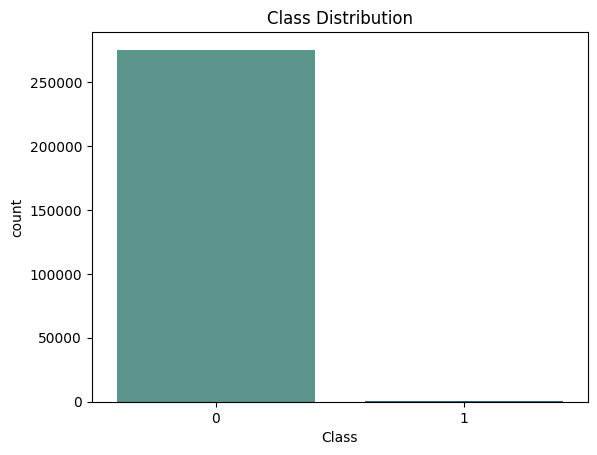

In [109]:

sns.countplot(x='Class', data=df, palette='crest')
plt.title('Class Distribution')
plt.show()


## STEP 11 : Data Analysis

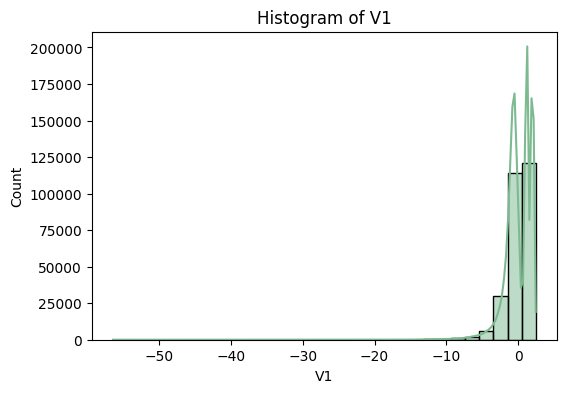

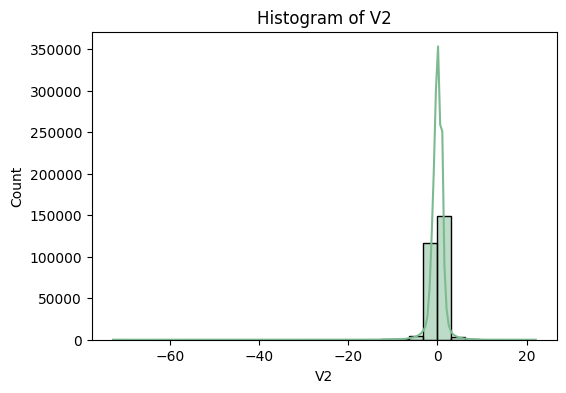

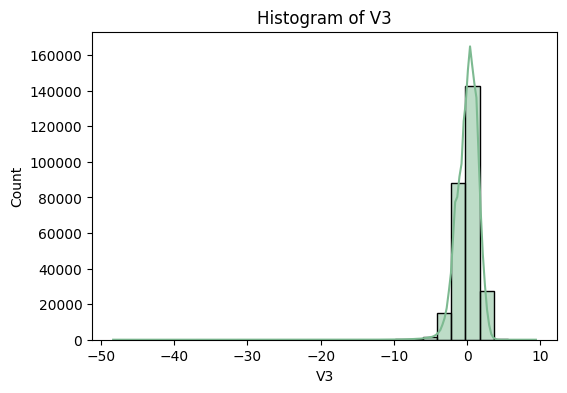

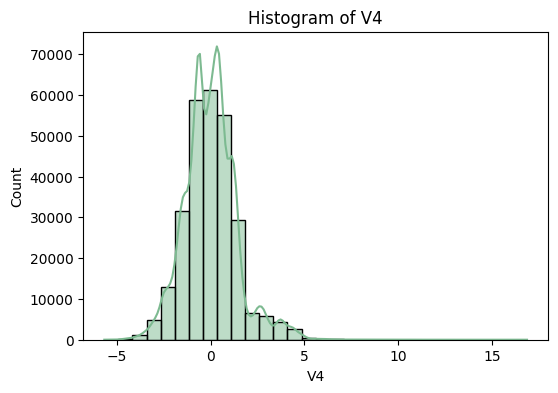

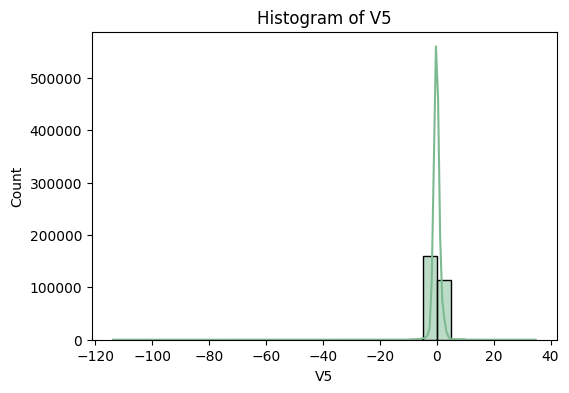

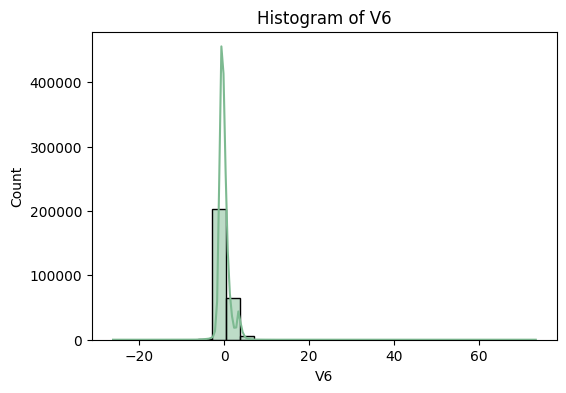

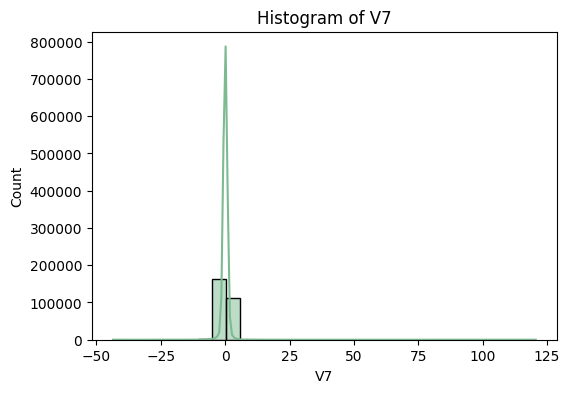

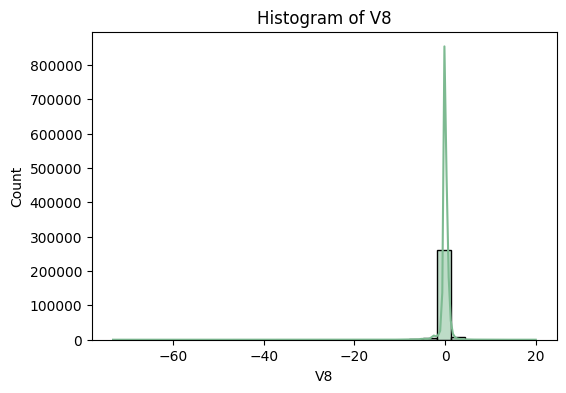

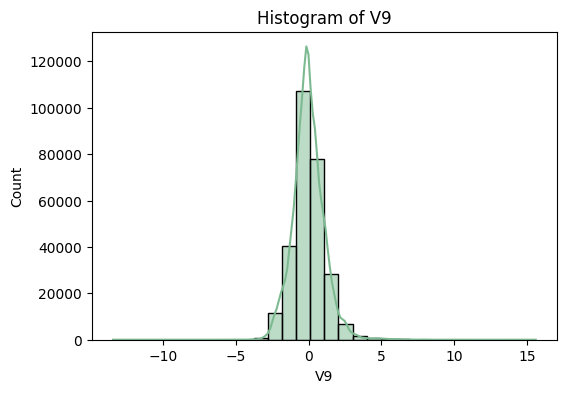

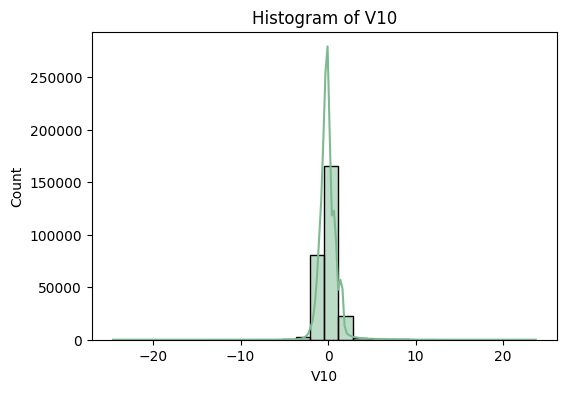

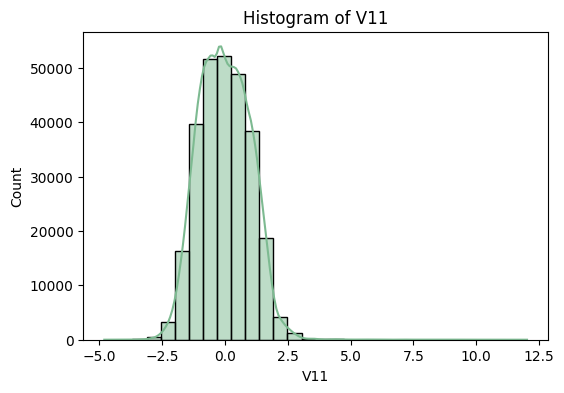

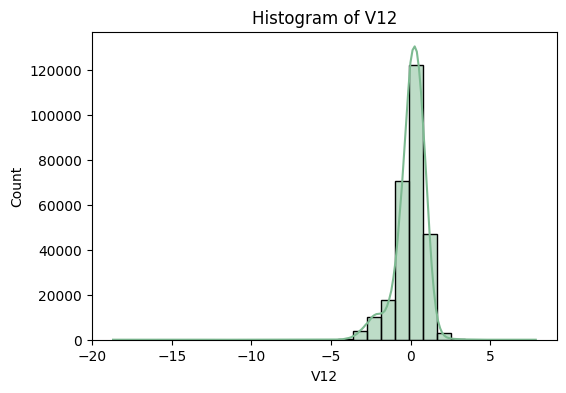

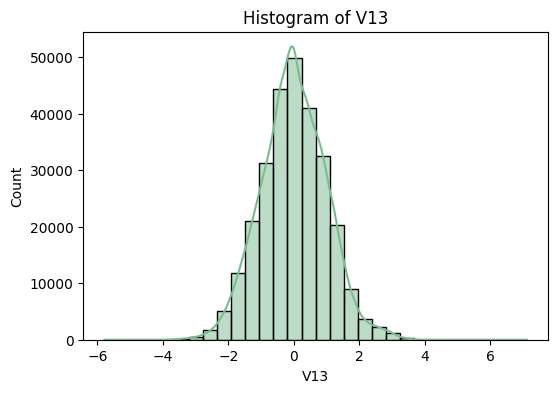

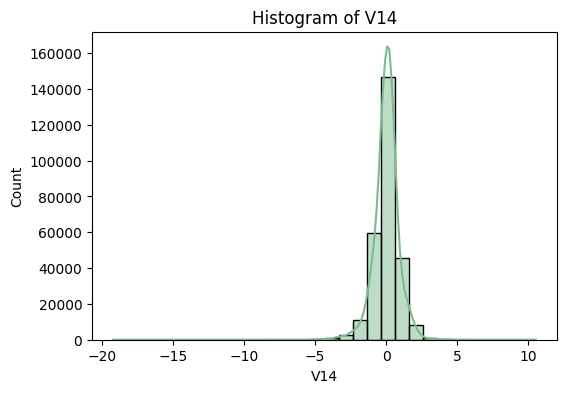

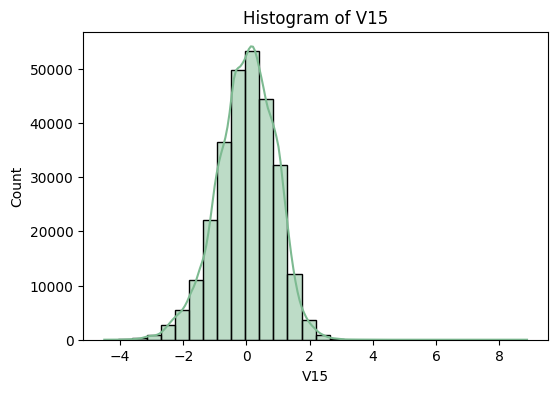

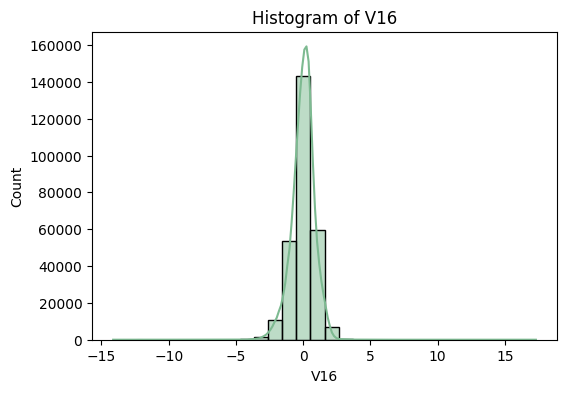

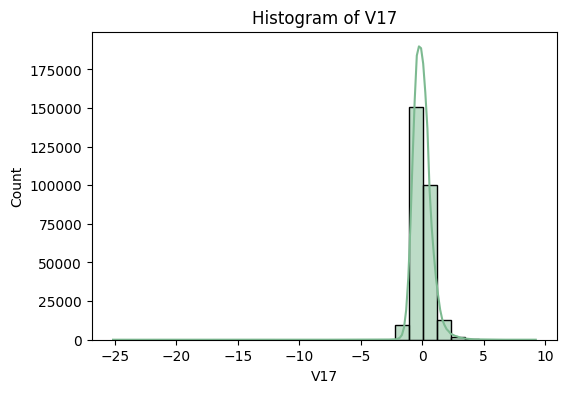

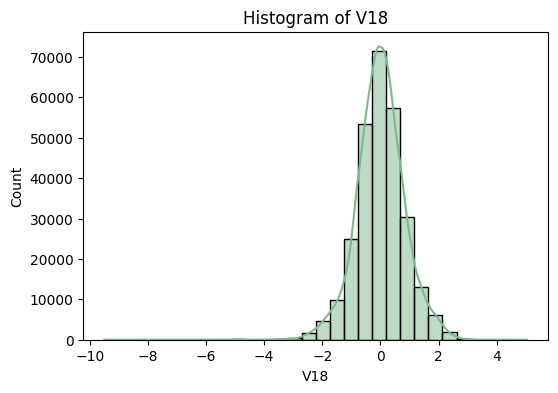

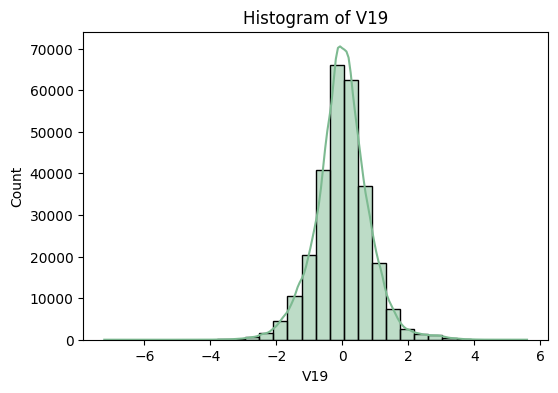

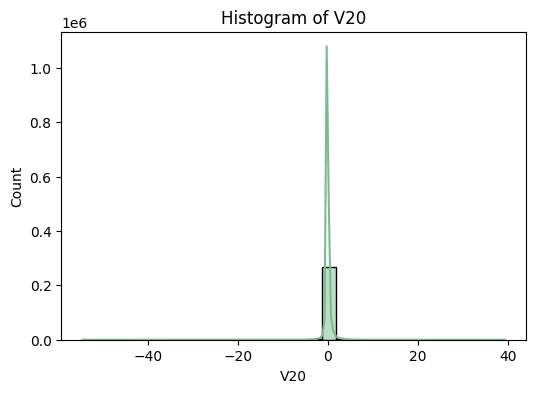

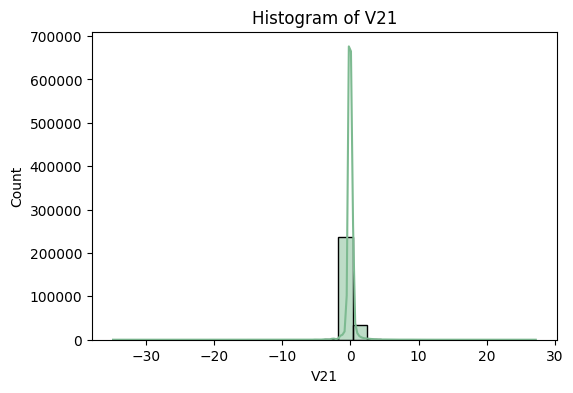

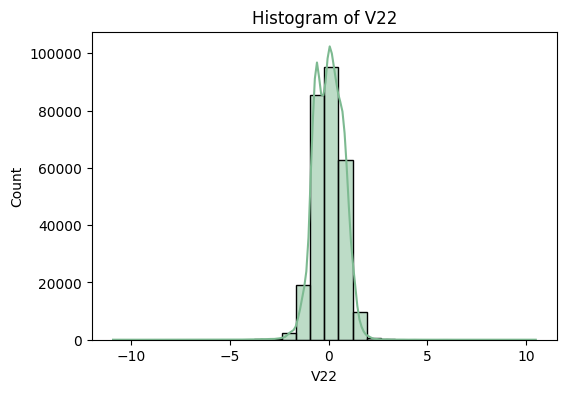

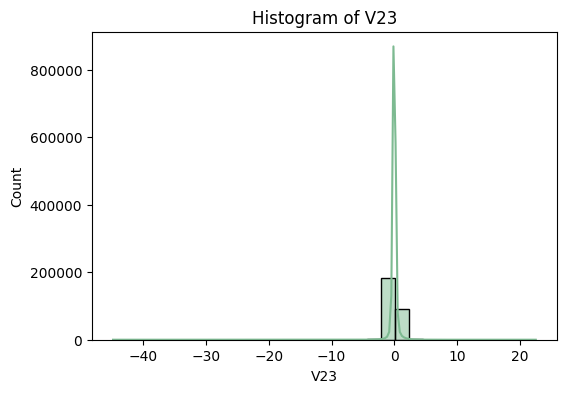

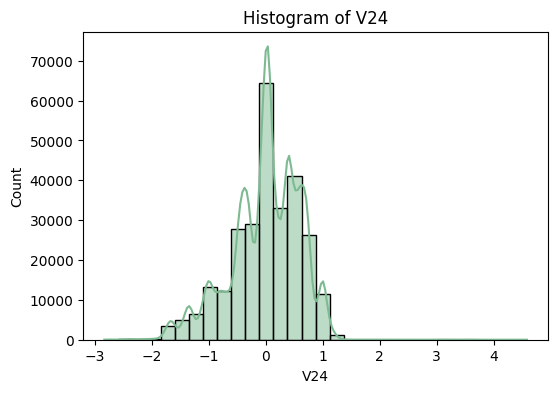

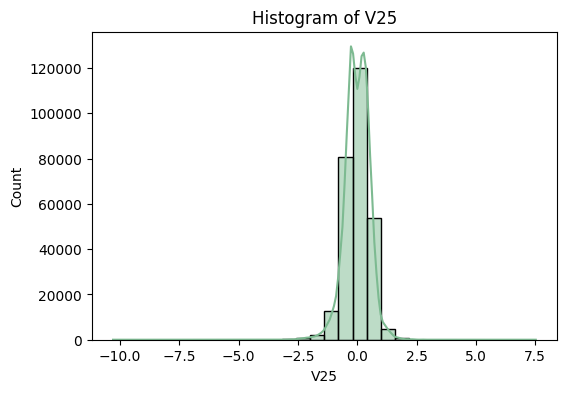

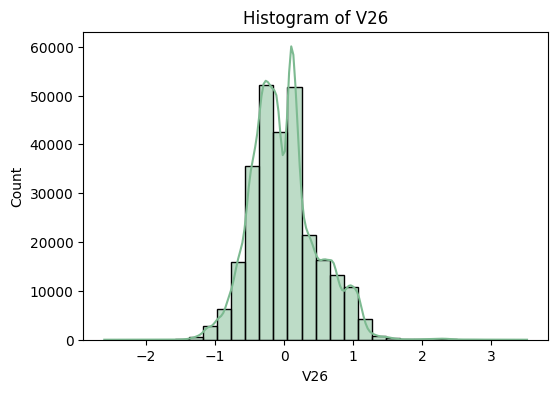

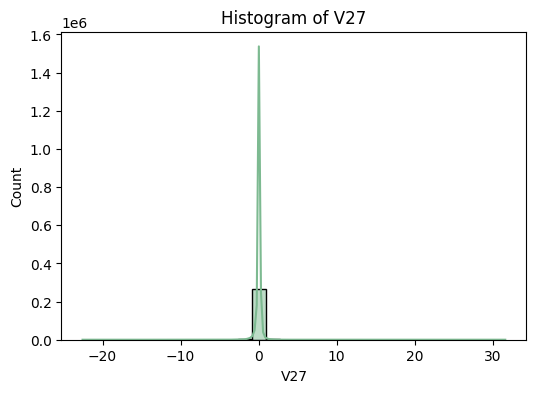

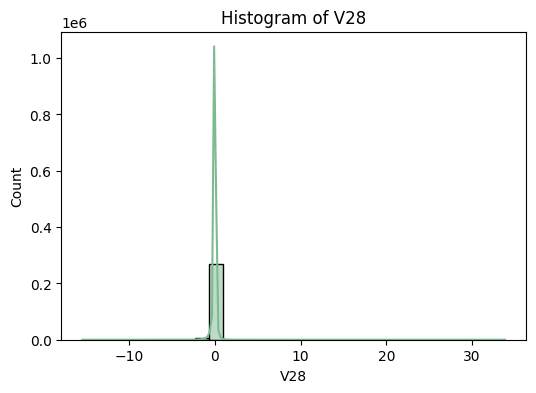

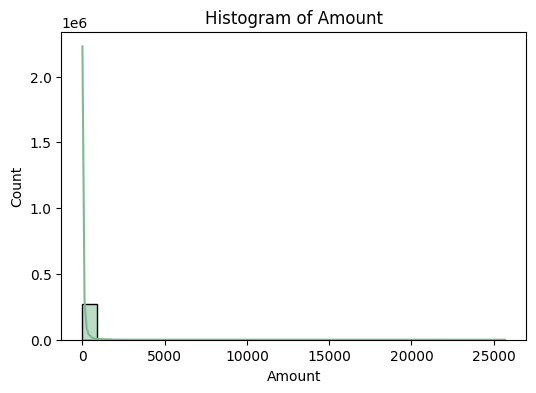

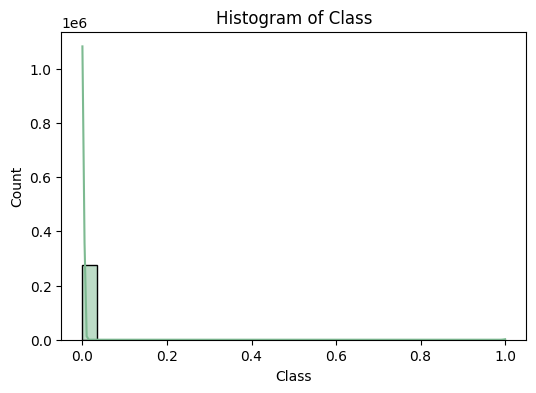

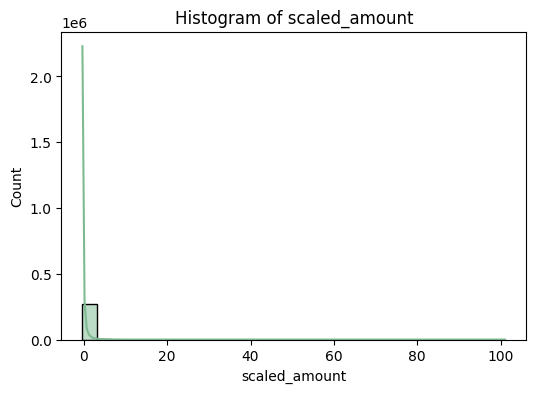

In [110]:
# Loop through all columns in the DataFrame and plot a histogram for each
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color=sns.color_palette("crest")[0], bins=30)  # Apply color from 'crest' palette
    plt.xlabel(column)
    plt.title(f'Histogram of {column}')
    plt.show()

## STEP 12: Store Feature Matrix in X and response or target in Y

In [111]:
X = df.drop('Class', axis=1)
y = df['Class']

## STEP 13 : Splitting the dataset to training and test dataset

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
  print(X_train.shape)
  print(X_test.shape)

(220530, 30)
(55133, 30)


In [114]:
  print(y_train.shape)
  print(y_test.shape)

(220530,)
(55133,)


## STEP 14: Handling imbalanced dataset

In [115]:
# Undersampling
# Oversampling

## 14.1 Under Sampling

In [116]:
nonfraud= df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [117]:
nonfraud.shape

(275190, 31)

In [118]:
fraud.shape

(473, 31)

In [119]:
nonfraud_sample = nonfraud.sample(n=473)

In [120]:
nonfraud_sample.shape

(473, 31)

In [121]:
df_new = pd.concat([nonfraud_sample, fraud],ignore_index=True)

In [122]:
df_new.shape

(946, 31)

In [123]:
df_new['Class'].value_counts()

,count
Class,
0,473
1,473


In [124]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-0.716876,0.746815,-1.084648,-0.244177,1.882209,-0.403902,1.652626,-0.865247,0.333885,0.361790,...,-0.197004,-0.263881,-0.055369,-0.607504,-0.000577,-0.886691,-0.767986,55.56,0,-0.138296
1,2.111908,0.609833,-2.832140,0.482984,1.215471,-0.946793,0.348833,-0.305887,0.444166,-1.225548,...,0.345626,-0.112458,-0.165226,0.399781,-0.092640,0.018587,0.008744,1.00,0,-0.353766
2,-6.116551,5.390852,-2.043020,0.777824,-1.072957,3.349241,-6.624199,-11.162664,-1.909902,-1.061880,...,1.767609,1.086709,-1.504244,-0.202124,-0.367943,-0.756644,0.155399,0.76,0,-0.354714
3,-0.353543,1.140729,1.194118,-0.142210,0.319211,-0.447582,0.655978,0.049249,-0.754069,-0.365179,...,-0.571581,-0.082745,-0.031297,-0.119750,0.072445,0.247384,0.086242,1.78,0,-0.350686
4,-0.735552,0.109407,-0.963539,0.051875,1.858241,0.020691,1.952021,-0.270905,0.181430,-0.992235,...,1.414024,0.189107,-1.007826,-0.006735,0.750740,0.026295,0.165848,207.23,0,0.460685


In [125]:
X = df_new.drop('Class', axis=1)
y = df_new['Class']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
print(X_train.shape)
print(X_test.shape)

(756, 30)
(190, 30)


In [128]:
print(y_train.shape)
print(y_test.shape)

(756,)
(190,)


In [129]:
print(y_train.value_counts())
print(y_test.value_counts())

Class
0    385
1    371
Name: count, dtype: int64
Class
1    102
0     88
Name: count, dtype: int64


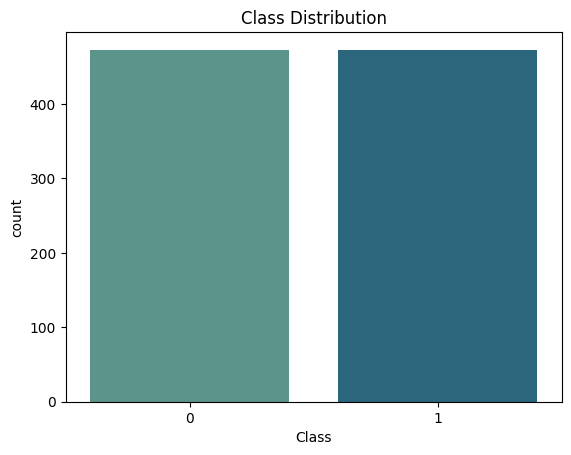

In [130]:
  sns.countplot(x='Class', data=df_new, palette='crest')
  plt.title('Class Distribution')
  plt.show()

## STEP 15 : Data Modelling

## 15.1 : Logistic Regression

In [131]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [132]:
y_pred1 = logreg.predict(X_test)

In [133]:
accuracy_score(y_test, y_pred1)

0.9368421052631579

In [134]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred1)

0.96875

In [135]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred1)

0.9117647058823529

In [136]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1)

0.9393939393939394

## 15.2 : Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier


In [138]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
y_pred2 = dt.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred2)

0.9105263157894737

In [141]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2)

0.9207920792079208

In [142]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred2)

0.9117647058823529

In [143]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2)

0.916256157635468

## 15.3: Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
y_pred3 = rf.predict(X_test)

In [146]:
accuracy_score(y_test, y_pred3)

0.9315789473684211

In [147]:
precision_score(y_test, y_pred3)

0.978494623655914

In [148]:
recall_score(y_test, y_pred3)

0.8921568627450981

In [149]:
f1_score(y_test, y_pred3)

0.9333333333333333

## 15.4 : SVM

In [150]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [151]:
y_pred4 = svm.predict(X_test)

In [152]:
accuracy_score(y_test, y_pred4)

0.8421052631578947

In [153]:
precision_score(y_test, y_pred4)

0.95

In [154]:
recall_score(y_test, y_pred4)

0.7450980392156863

In [155]:
f1_score(y_test, y_pred4)

0.8351648351648352

In [156]:
final_data = pd.DataFrame({'Models':['logreg','DT','RF','svm'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [157]:
final_data

,Models,ACC
0,logreg,93.684211
1,DT,91.052632
2,RF,93.157895
3,svm,93.157895


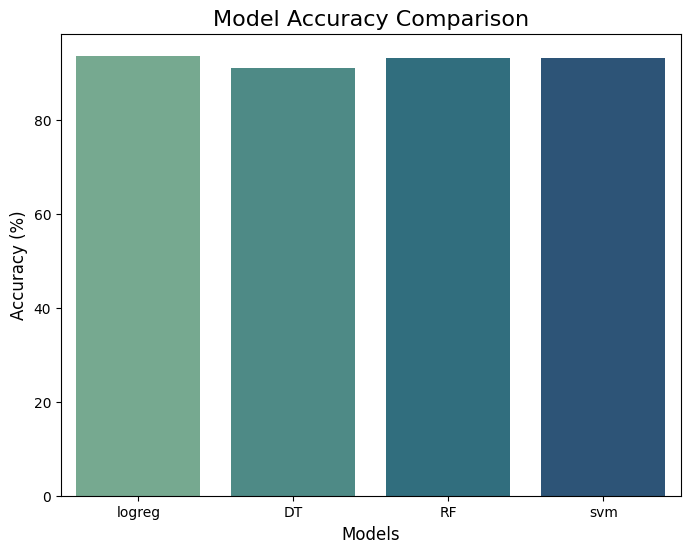

In [158]:
# Create the final_data DataFrame
final_data = pd.DataFrame({
    'Models': ['logreg', 'DT', 'RF', 'svm'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100,
        accuracy_score(y_test, y_pred3) * 100  # Check if y_pred3 is correct for the last model
    ]
})

# Plotting the accuracy of different models
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data, palette='crest')

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

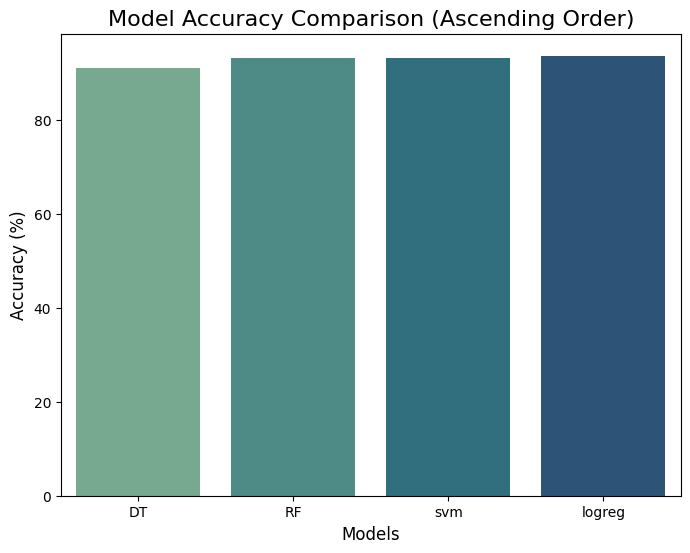

In [159]:
# Sort final_data by 'ACC' in ascending order
final_data_sorted = final_data.sort_values(by='ACC', ascending=True)

# Plotting the accuracy of different models
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data_sorted, palette='crest')

# Adding titles and labels
plt.title('Model Accuracy Comparison (Ascending Order)', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

## STEP 16 : OverSampling

In [160]:
X = df.drop('Class', axis=1)
y = df['Class']

In [161]:
X.shape

(275663, 30)

In [162]:
y.shape

(275663,)

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
# Remove rows with missing target values
X = X[~y.isnull()]
y = y.dropna()



In [165]:
# Apply SMOTE to the cleaned data
X_res, y_res = SMOTE().fit_resample(X, y)

In [166]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [169]:
X_res.shape

(550380, 30)

In [171]:
y_res.shape

(550380,)

## 16.1 Logistic Regression

In [172]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [173]:
y_pred_11 = logreg.predict(X_test)

In [174]:
accuracy_score(y_test, y_pred_11)

0.9573294814491806

In [175]:
precision_score(y_test, y_pred_11)

0.9803857906799083

In [176]:
recall_score(y_test, y_pred_11)

0.9332763667436321

In [177]:
f1_score(y_test, y_pred_11)

0.9562512224881943

## 16.2: Decision Tree

In [178]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
y_pred_12 = dt.predict(X_test)

In [180]:
accuracy_score(y_test, y_pred_12)

0.9980649732911806

In [183]:
precision_score(y_test, y_pred_12)

0.9970967156595899

In [184]:
recall_score(y_test, y_pred_12)

0.9990364161954802

In [185]:
f1_score(y_test, y_pred_12)

0.9980656234958634

## 16.3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred_13 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_13)

In [ ]:
precision_score(y_test, y_pred_13)

In [ ]:
recall_score(y_test, y_pred_13)

In [ ]:
f1_score(y_test, y_pred_13)

## 16.4 :  SVM